In [4]:
from sklearn.datasets import load_iris

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [6]:
iris = load_iris()
X = iris.data 
y = iris.target 


In [21]:
print("Length of train dataset:", len(X_train))
print("Length of X dataset:", len(X))

Length of train dataset: 112
Length of X dataset: 150


In [26]:
''' 
Examining accuracy of model by splitting training and testing data.
Different random state values generate a wide range of accuracy values. 
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test) 
metrics.accuracy_score(y_test, y_pred)

0.9473684210526315

In [37]:
from sklearn.model_selection import KFold
kf = KFold(25, n_splits=5, shuffle=False)

print('{}{:^61}{}'.format('Iteration', 'Training set observations', 'Testng set observations'))
for iteration, data in enumerate(kf.split(X), start=1): 
    print('{!s:^9}{}{!s:^25}'.format(iteration, data[0], data[1]))

Iteration                  Training set observations                  Testng set observations
    1    [  6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149]      [0 1 2 3 4 5]      
    2    [  0   1   2   3   4   5  12  13  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  7

In [ ]:
.8947368 for random state 7 
.97368421 for random state 6 
.947368 for random state 5 

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
'''10-fold cross validation model
KNN model is intended for class-data
Examines neighboring data points to predict new data point 
n_neighbors is the number of nearby data points that will be used to determine the predicted data point
'''
knn = KNeighborsClassifier(n_neighbors=5)
'''Entire X and y data sets are passed through, as model will split data 
cv = 10 folds 
'''
scores = cross_val_score(knn, X, y, cv=10)
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [9]:
##average scores
print(scores.mean())

0.9666666666666668


In [15]:
k_range = range(1,31)
k_scores = []

'''Purpose: find optimal value of k 
loop through k_range
run classifier KNeighbors with k neighbours 
obtain cross_val_score value wiht k neighbours 
append value to list 
'''
for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors=k) 
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-validated accuracy')

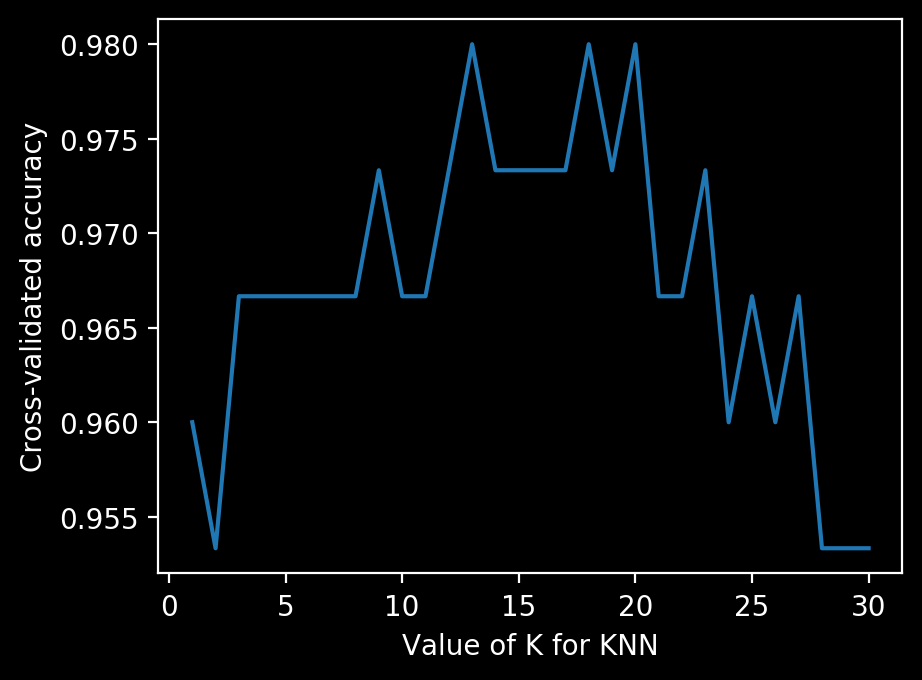

In [20]:
'''Plot k_score results 
Y-axis: cross-validated accuracy 
x-axis: K value 
'''
import matplotlib.pyplot as plt 
%matplotlib inline
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [21]:
#Best K model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [ ]:
from sklearn.linear_model import LogisticRegression